## Work
1. 請比較使用不同層數(原範例是兩層隱藏層)以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# 預防錯誤： OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
from keras.layers import Dropout

# 三層隱藏層，一個輸出層(softmax)
def build_mlp(input_shape, output_units=10, drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    x = keras.layers.Dense(units=256, activation="relu", name="hidden_layer_0")(input_layer)
    x = Dropout(drp_ratio)(x)
    x = keras.layers.Dense(units=128, activation="relu", name="hidden_layer_1")(x)
    x = Dropout(drp_ratio)(x)
    x = keras.layers.Dense(units=64, activation="relu", name="hidden_layer_2")(x)
    x = Dropout(drp_ratio)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [17]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.1, 0.2, 0.3]

In [18]:
def run_model(results: dict, dropout_ratio: float):
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "dropout-{}".format(str(dropout_ratio))

    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

In [19]:
results = {}

for dropout in Dropout_EXP:
    run_model(results, dropout)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 256)               786688    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
__________

50000/50000 [==============================] - 11s 229us/step - loss: 1.5093 - acc: 0.4581 - val_loss: 1.4766 - val_acc: 0.4813
Epoch 50/50
50000/50000 [==============================] - 12s 242us/step - loss: 1.5044 - acc: 0.4584 - val_loss: 1.4698 - val_acc: 0.4742
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 256)               786688    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
______

50000/50000 [==============================] - 12s 235us/step - loss: 1.5112 - acc: 0.4565 - val_loss: 1.4731 - val_acc: 0.4763
Epoch 48/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.5073 - acc: 0.4586 - val_loss: 1.4468 - val_acc: 0.4853
Epoch 49/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.5112 - acc: 0.4573 - val_loss: 1.4685 - val_acc: 0.4761
Epoch 50/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5041 - acc: 0.4611 - val_loss: 1.4677 - val_acc: 0.4753
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer_0 (Dense)       (None, 256)               786688    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0

50000/50000 [==============================] - 12s 240us/step - loss: 1.5406 - acc: 0.4457 - val_loss: 1.4782 - val_acc: 0.4742
Epoch 46/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.5403 - acc: 0.4456 - val_loss: 1.4802 - val_acc: 0.4760
Epoch 47/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5428 - acc: 0.4449 - val_loss: 1.4887 - val_acc: 0.4705
Epoch 48/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5325 - acc: 0.4508 - val_loss: 1.4844 - val_acc: 0.4741
Epoch 49/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5293 - acc: 0.4498 - val_loss: 1.4798 - val_acc: 0.4728
Epoch 50/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.5270 - acc: 0.4508 - val_loss: 1.4804 - val_acc: 0.4711


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

def drawing(results: dict):
    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.ylim([0, 5])
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

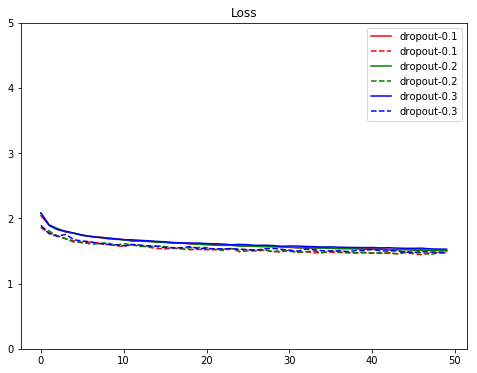

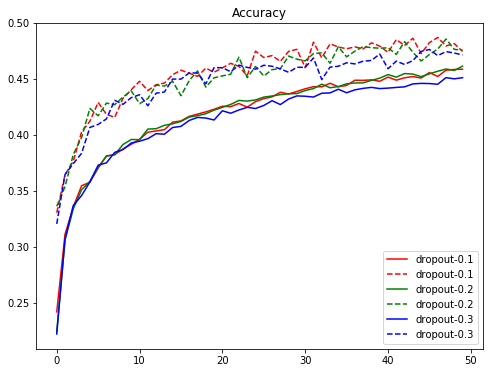

In [21]:
drawing(results)

### Answer

從上圖來看，不同的dropout比例對loss相當接近
但是在accuracy上，比較看得出差別
不論是train或validate集，較高的drouput比例（0.3）正確率都比較低的drouput比例（0.1､0.2）來得差